<a href="https://colab.research.google.com/github/isaack98/CNN-Using--MNIST/blob/main/CNN_Using_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We are importing Keras and Tensorflow which are Deep learning libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Original Training Data Shape (Images): {x_train.shape}")
print(f"Original Training Labels Shape: {y_train.shape}")
print(f"Total Training Samples: {len(x_train)}")
print(f"Total Test Samples: {len(x_test)}")

Original Training Data Shape (Images): (60000, 28, 28)
Original Training Labels Shape: (60000,)
Total Training Samples: 60000
Total Test Samples: 10000


In [ ]:
#  Preprocessing the Data
# MNIST images are 28x28 grayscale.
# CNNs expect a 4D input: (samples, height, width, channels).
# For grayscale, the channel dimension is 1

# Reshape the data to add the channel dimension (1 for grayscale)
# (60000, 28, 28) becomes (60000, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

print(f"Reshaped Training Data Shape: {x_train.shape}")

Reshaped Training Data Shape: (60000, 28, 28, 1)


In [ ]:
# Scaling and Normalization
# Pixel values range from 0 to 255.
#  We normalize them to the range [0, 1] to improve model convergence.

# Convert data types to float32 and normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-Hot Encoding Labels
# One-Hot Encoding (OHE) is a process used to convert categorical data,
#  specifically the output labels, into a numerical format that machine learning models,
# including Convolutional Neural Networks (CNNs), can easily process and interpret.
# The target labels (0 through 9) must be converted into a binary format (one-hot encoding) for the classification task.
# Convert labels to one-hot encoding (e.g., 5 becomes [0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

# Reload y_train and y_test to ensure they are defined
# This assumes mnist is imported from a previous cell.
# We only need the labels, so we can discard the image data from this reload.
(_, y_train), (_, y_test) = mnist.load_data()

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(f"One-Hot Encoded Training Labels Shape: {y_train.shape}")

One-Hot Encoded Training Labels Shape: (60000, 10)


In [ ]:
# --- 3. Defining the CNN Architecture ---

model = Sequential([
    # 1. Convolutional Layer: Finds features like edges and curves.
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

    # 2. Pooling Layer: Reduces dimensionality and makes feature detection robust to translation.
    MaxPooling2D(pool_size=(2, 2)),

    # 3. Flatten Layer: Converts the 2D feature maps into a 1D vector for the Dense layers.
    Flatten(),

    # 4. Dense Layer (Hidden): Standard fully-connected neural network layer.
    Dense(128, activation='relu'),

    # 5. Output Layer: 10 neurons (one for each digit) with softmax for probability distribution.
    Dense(num_classes, activation='softmax')
])

# Display the model structure
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the Model
# This step configures the model with an optimizer, a loss function, and metrics

# --- 4. Compiling the Model ---

model.compile(
    optimizer='adam',                   # A common, effective optimizer
    loss='categorical_crossentropy',    # Standard loss function for multi-class classification
    metrics=['accuracy']                # Metric to monitor during training
)

In [ ]:
# Training the Model
# Here we feed the prepared data into the CNN to begin the learning process.
# --- 5. Training the Model ---

history = model.fit(
    x_train,
    y_train,
    epochs=10,             # Number of times to iterate over the training data
    batch_size=32,         # Number of samples per gradient update
    validation_split=0.1   # Use 10% of training data for validation
)

print("\nModel training complete.")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.9052 - loss: 0.3121 - val_accuracy: 0.9837 - val_loss: 0.0588
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9836 - loss: 0.0534 - val_accuracy: 0.9858 - val_loss: 0.0483
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9900 - loss: 0.0320 - val_accuracy: 0.9858 - val_loss: 0.0501
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9935 - loss: 0.0197 - val_accuracy: 0.9885 - val_loss: 0.0441
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9860 - val_loss: 0.0536
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9878 - val_loss: 0.0473
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9981 - loss: 0.0065 - val_accuracy: 0.9905 - val_loss: 0.0492
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9980 -


--- Final Model Performance ---
Test Loss: 0.0531
Test Accuracy: 98.73%


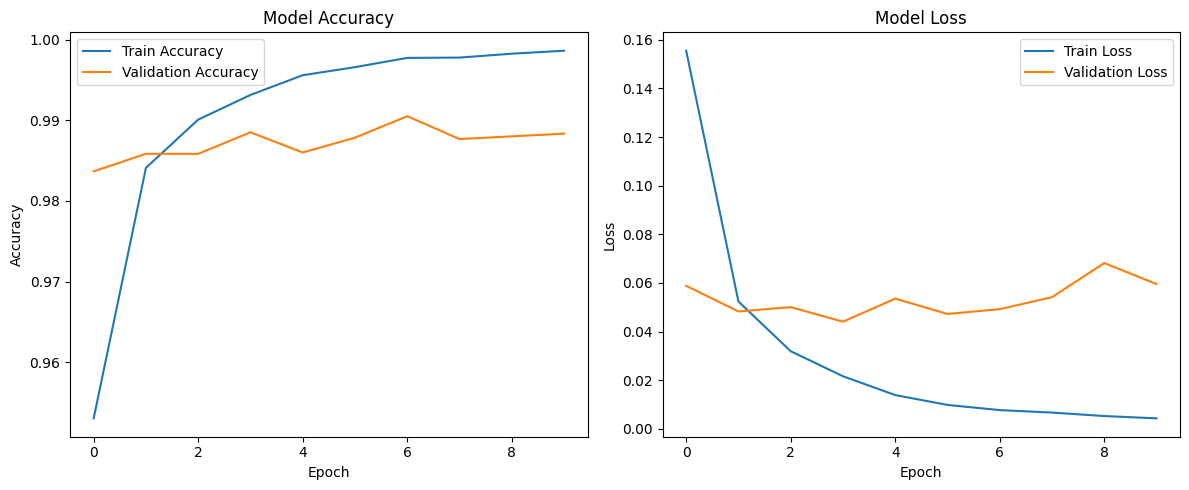

In [ ]:
# Evaluation and Visualization
# We need evaluation and visualization in CNNs because:
# 1. they are the critical steps that confirm the model is learning correctly,
# 2. provide insights into how it works,
# 3. and measure its readiness for deployment

# --- . Model Evaluation ---

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"\n--- Final Model Performance ---")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# --- Plotting Training History ---

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

# Define constants for image processing and class names
IMG_SIZE = 28 # MNIST images are 28x28
CLASS_NAMES = [str(i) for i in range(num_classes)] # Assuming num_classes is defined (it is 10)

def predict_new_image(model, img_path):
    """
    Predicts the class (digit) of a single image using a trained CNN model
    (adjusted for 28x28 grayscale MNIST input).
    """
    try:
        # Load and preprocess the image (must be 28x28 and grayscale)
        img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE)).convert('L') # Convert to Grayscale 'L'

        # Convert PIL Image to a numpy array
        img_array = img_to_array(img)

        # Normalize and Reshape: (28, 28, 1) and add batch dimension (1, 28, 28, 1)
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class
        # Note: model's last layer is Softmax, so we use direct predict()
        prediction = model.predict(img_array, verbose=0)
        predicted_class_index = np.argmax(prediction[0])
        confidence = np.max(prediction[0])

        predicted_class_name = CLASS_NAMES[predicted_class_index]

        # Display results
        print("\n🖼️ Image Path:", img_path)
        print("🔍 Predicted Class:", predicted_class_name)
        print(f"✅ Confidence: {confidence*100:.2f}%")

        plt.imshow(img, cmap='gray')
        plt.title(f"Prediction: {predicted_class_name} ({confidence*100:.2f}%)")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"❌ Error during prediction: {e}")

# Example Usage:
# To run the example below, you must have a test image saved in your directory,
# for example, a file named 'sample_2.png' containing a handwritten digit '2'.
# If you don't have a test image, you can skip this part.

# print("\n--- Example Prediction ---")
# # predict_new_image(model, "sample_images/digit_7.png")


Saved sample test image 'sample_digit_7.png' (True Label: 7) for prediction test.

--- Prediction Test on Generated Sample ---

🖼️ Image Path: sample_digit_7.png
🔍 Predicted Class: 7
✅ Confidence: 100.00%


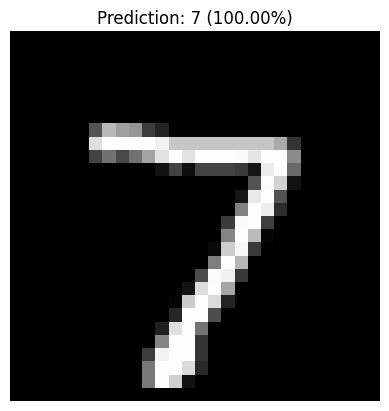

In [46]:
from PIL import Image

# Creating a Sample Test Image
# Creating and Testing a Sample (Requires PIL and Matplotlib) ---

# Define IMG_SIZE here to ensure it's available for this cell's execution,
# in case the cell defining it earlier hasn't been run or is out of order.
IMG_SIZE = 28

# Get the first image from the test set (before normalization/reshape)
sample_image_data = x_test[0].reshape(IMG_SIZE, IMG_SIZE) * 255
true_label = np.argmax(y_test[0])

# Convert the NumPy array to a PIL Image and save it
sample_img_pil = Image.fromarray(sample_image_data.astype(np.uint8))
sample_file_path = f"sample_digit_{true_label}.png"
sample_img_pil.save(sample_file_path)

print(f"\nSaved sample test image '{sample_file_path}' (True Label: {true_label}) for prediction test.")

# Use the prediction function with the generated file
print("\n--- Prediction Test on Generated Sample ---")
predict_new_image(model, sample_file_path)


🖼️ Image Path: /content/HP Laptop.webp
🔍 Predicted Class: 2
✅ Confidence: 49.23%


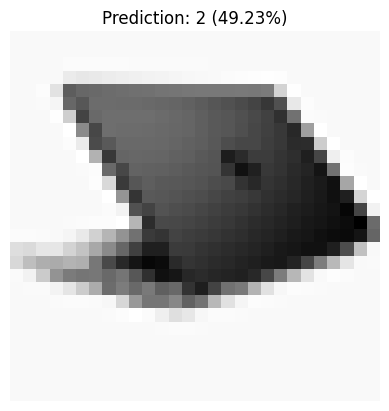

In [42]:
predict_new_image(model, "/content/HP Laptop.webp")


🖼️ Image Path: /content/eight.jpg
🔍 Predicted Class: 3
✅ Confidence: 62.63%


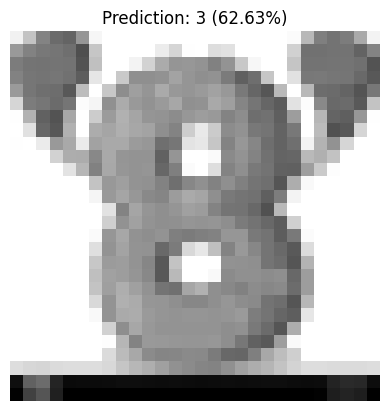

In [43]:
predict_new_image(model, "/content/eight.jpg")


🖼️ Image Path: /content/eleven.jpg
🔍 Predicted Class: 3
✅ Confidence: 48.98%


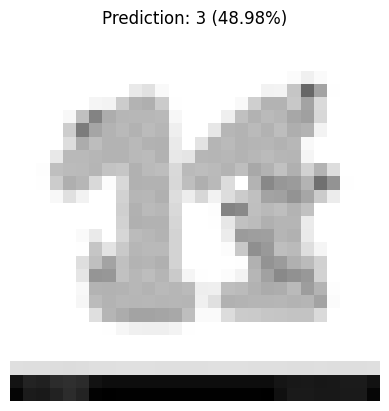

In [44]:
predict_new_image(model, "/content/eleven.jpg")


🖼️ Image Path: /content/five.jpg
🔍 Predicted Class: 5
✅ Confidence: 17.22%


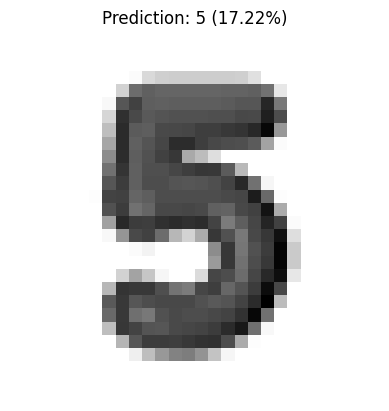

In [45]:
predict_new_image(model, "/content/five.jpg")